# Temperature Prediction Analysis using Multiple Regression Models

This notebook performs a comprehensive analysis of temperature prediction using various machine learning regression models. The analysis includes:

## Data and Features
- Target Variable: Temperature in the dining room (`Temperature_Comedor_Sensor`)
- Input Features:
  - Room Temperature Sensor
  - Weather Temperature
  - CO2 Level in Dining Room
  - Humidity in Dining Room
  - Lighting in Dining Room
  - Time-based features (Hour, Month, Day of Week)

## Models Evaluated
1. Linear Regression
2. Ridge Regression (L2 regularization)
3. Lasso Regression (L1 regularization)
4. Polynomial Regression (degree 2)
5. Random Forest
6. Gradient Boosting
7. AdaBoost

## Analysis Components
- Model Training and Testing
- Performance Metrics (MSE, MAE, R² Score)
- Visualization of Results:
  - Predictions vs Actuals Scatter Plots
  - MSE Comparison Bar Chart
  - Grid Search RMSE Comparison
  - Residual Analysis
  - Feature Importance (for tree-based models)

The code below implements this analysis pipeline and provides comprehensive visualizations to compare model performance.

## Library Imports and Setup
Importing required machine learning libraries and setting up initial RMSE scores for model comparison:

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
from data_loader import load_df1, load_df2



## Data Loading and Model Training
Loading training and test datasets, defining feature columns, and training multiple regression models:

In [96]:
# Load data
df1 = load_df1()
df2 = load_df2()

feature_cols = [
    'Temperature_Habitacion_Sensor', 'Weather_Temperature',
    'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor',
    'Lighting_Comedor_Sensor', 'Hour', 'Month', 'Day_Of_Week'
]
target_col = 'Temperature_Comedor_Sensor'

if not all(col in df1.columns for col in feature_cols + [target_col]):
    print("Please update feature_cols and target_col with actual column names from your data.")
else:
    X_train = df1[feature_cols]
    y_train = df1[target_col]
    X_test = df2[feature_cols]
    y_test = df2[target_col]

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=1.0),
        "Polynomial Regression": Pipeline([
            ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
        ]),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2, 'y_pred': y_pred}

Class Distribution:
Temperature_Comedor_Sensor
21.3040    5
20.5147    4
18.6340    4
20.0267    4
21.2320    4
          ..
20.6400    1
20.1640    1
19.9120    1
19.6407    1
19.3721    1
Name: count, Length: 2351, dtype: int64


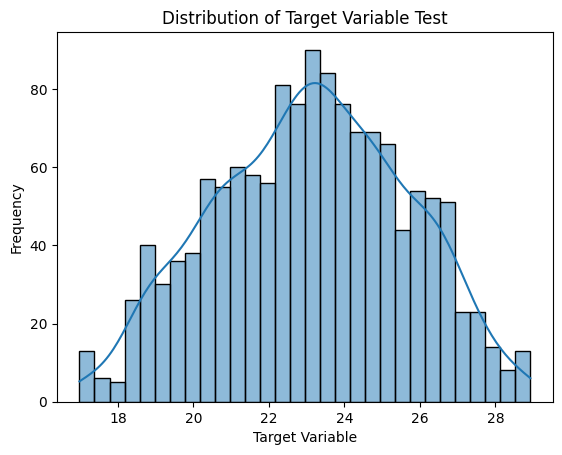

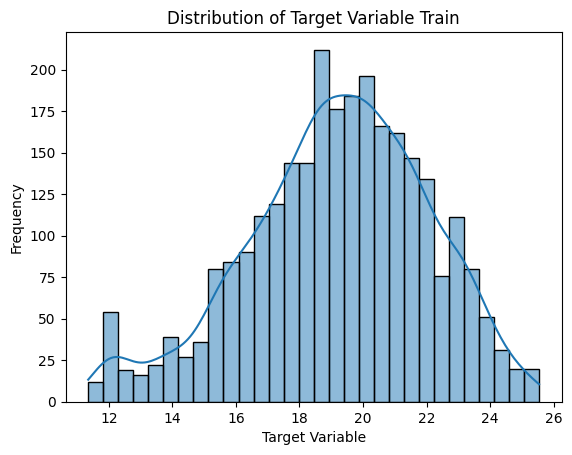

In [97]:
import seaborn as sns
class_counts = df1[target_col].value_counts()
print("Class Distribution:")
print(class_counts)

sns.histplot(df2[target_col], bins=30, kde=True)
plt.title('Distribution of Target Variable Test')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df1[target_col], bins=30, kde=True)
plt.title('Distribution of Target Variable Train')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x1200 with 0 Axes>

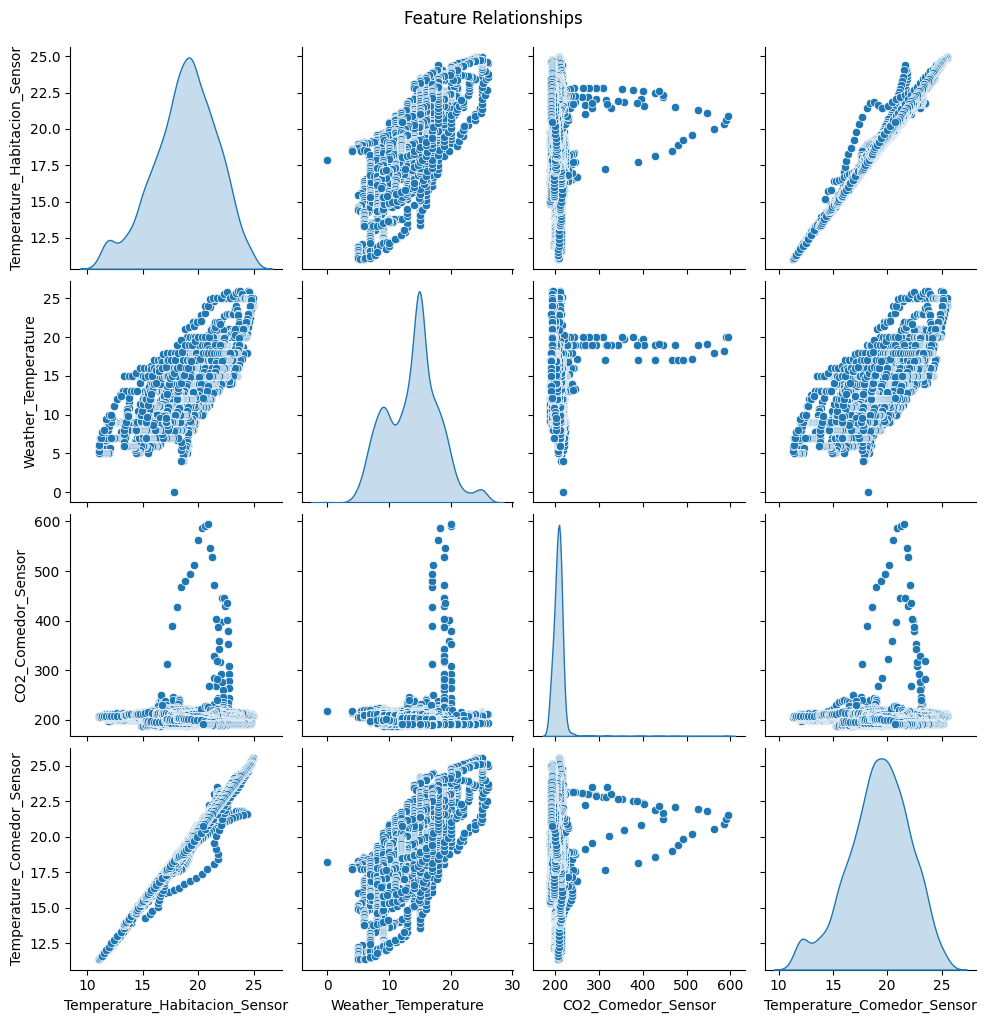

In [98]:
# Pairplot of key features
key_features = ['Temperature_Habitacion_Sensor', 'Weather_Temperature', 
               'CO2_Comedor_Sensor', target_col]
plt.figure(figsize=(12, 12))
sns.pairplot(df1[key_features], diag_kind='kde')
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

In [99]:
  # Summary table of metrics
summary_df = pd.DataFrame({
        'Model': list(results.keys()),
        'MSE': [res['mse'] for res in results.values()],
        'RMSE': [res['rmse'] for res in results.values()],
        'MAE': [res['mae'] for res in results.values()],
        'R2 Score': [res['r2'] for res in results.values()]
    })
print("\nModel Performance Summary:")
print(summary_df)


Model Performance Summary:
                   Model       MSE      RMSE       MAE  R2 Score
0      Linear Regression  0.033882  0.184071  0.153075  0.994794
1       Ridge Regression  0.033869  0.184035  0.153037  0.994796
2       Lasso Regression  0.324293  0.569467  0.475365  0.950174
3  Polynomial Regression  0.140722  0.375129  0.279480  0.978379
4          Random Forest  0.551673  0.742747  0.427373  0.915238
5      Gradient Boosting  0.895472  0.946294  0.605578  0.862415
6               AdaBoost  2.309143  1.519587  1.120274  0.645211


## Best Model Identification
Identifying the best performing model based on Mean Squared Error (MSE):

In [100]:
# Identify best model by MSE
best_model = min(results, key=lambda k: results[k]['rmse'])
best_score = results[best_model]['rmse']

print(f"✅ Best model: **{best_model}** with RMSE: **{best_score:.4f}**\n")
print(f"✅ Best model: **{best_model}** with R2: **{results[best_model]['r2']:.4f}**\n")


✅ Best model: **Ridge Regression** with RMSE: **0.1840**

✅ Best model: **Ridge Regression** with R2: **0.9948**



## Model Predictions Visualization
Generating scatter plots of predicted vs actual values for each model:

X-axis: Actual target values (true values from the dataset).

Y-axis: Predicted values by the model.

Blue dots: Predictions of the model for individual data points.

Red dashed line: Ideal line where predicted = actual (perfect prediction).

RMSE (Root Mean Square Error): Quantifies prediction error. Lower RMSE means better accuracy.

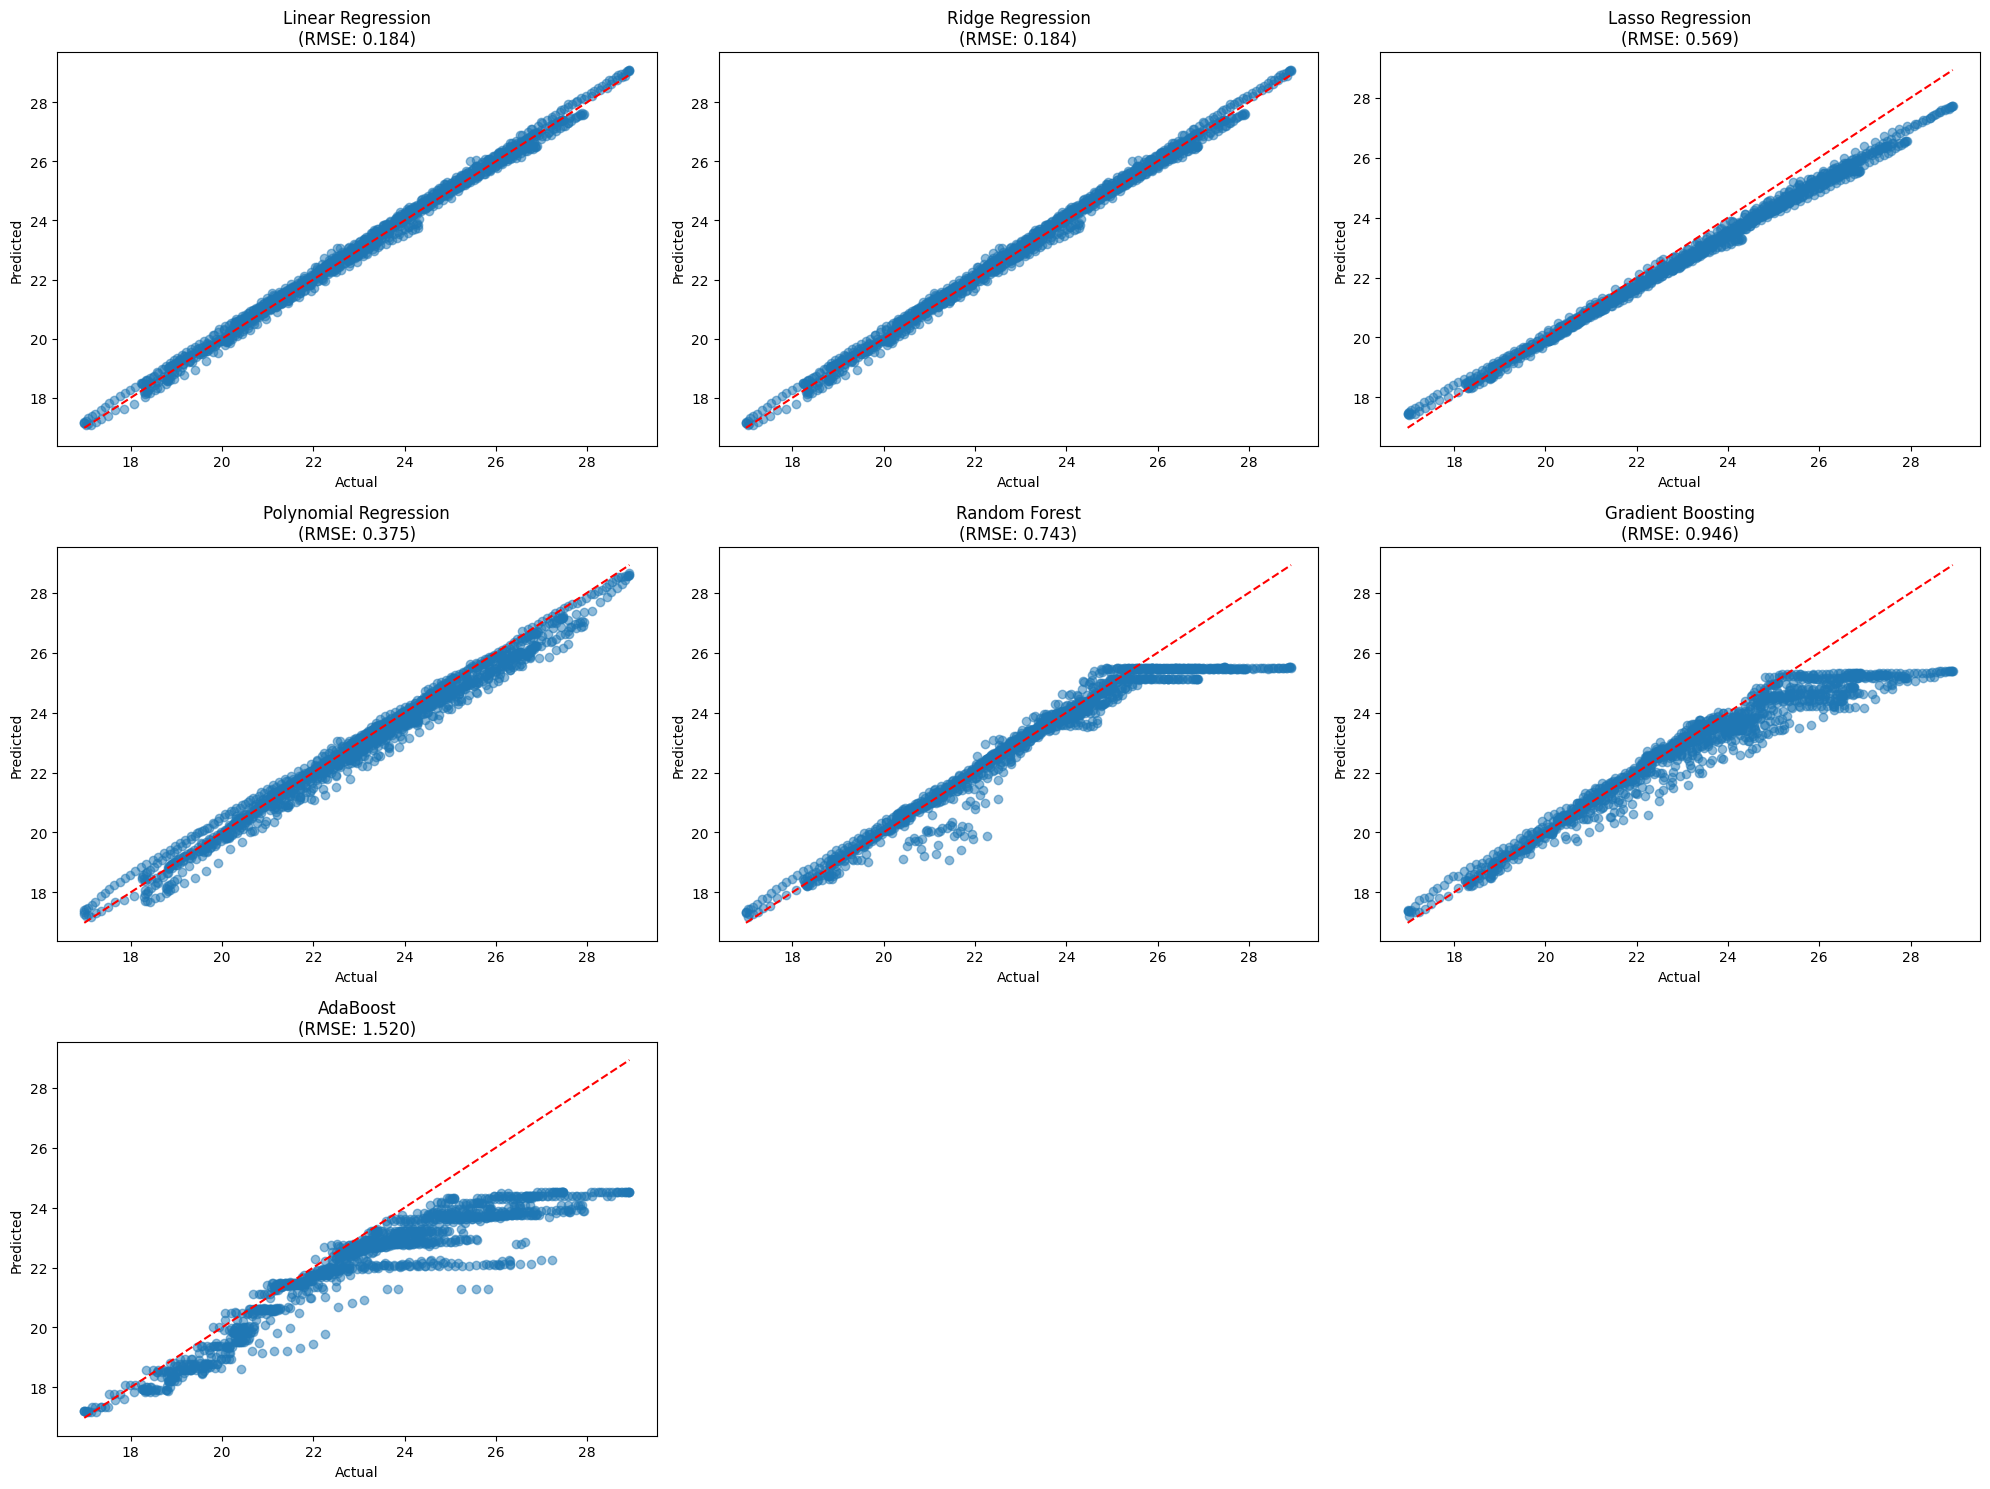

In [101]:
# Plot predictions vs actuals
plt.figure(figsize=(20, 15))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(3, 3, i+1)
    plt.scatter(y_test, res['y_pred'], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"{name}\n(RMSE: {res['rmse']:.3f})")
plt.tight_layout()
plt.show()

## Model RMSE Comparison
Visualizing the Root Mean Squared Error comparison across all models:

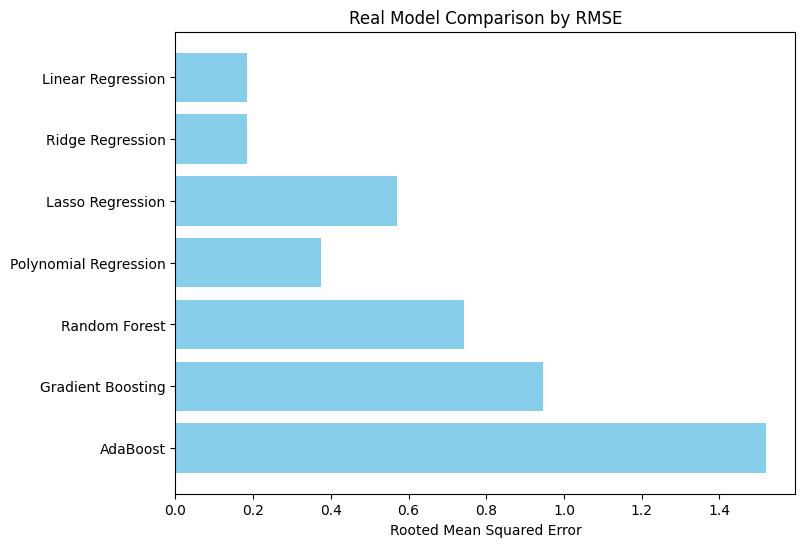

In [102]:
  # Bar chart of MSE comparison
plt.figure(figsize=(8, 6))
rmse_values = [res['rmse'] for res in results.values()]
model_names = list(results.keys())
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('Rooted Mean Squared Error')
plt.title('Real Model Comparison by RMSE')
plt.gca().invert_yaxis()
plt.show()


## Hyperparameter Tuning Results
Visualizing the RMSE scores from different hyperparameter combinations:

Running GridSearchCV for Linear Regression...
Best params for Linear Regression: {}
Running GridSearchCV for Ridge Regression...
Best params for Ridge Regression: {'alpha': 0.1}
Running GridSearchCV for Lasso Regression...
Best params for Lasso Regression: {'alpha': 0.01}
Running GridSearchCV for Polynomial Regression...
Best params for Polynomial Regression: {'poly__degree': 2}
Running GridSearchCV for Random Forest...
Best params for Random Forest: {'max_depth': None, 'n_estimators': 100}
Running GridSearchCV for Gradient Boosting...
Best params for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Running GridSearchCV for AdaBoost...
Best params for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 200}

Model Performance Summary:
                   Model       MSE      RMSE       MAE  R2 Score
0      Linear Regression  0.033882  0.184071  0.153075  0.994794
1       Ridge Regression  0.033881  0.184067  0.153071  0.994794
2       Lasso Regression  0.03176

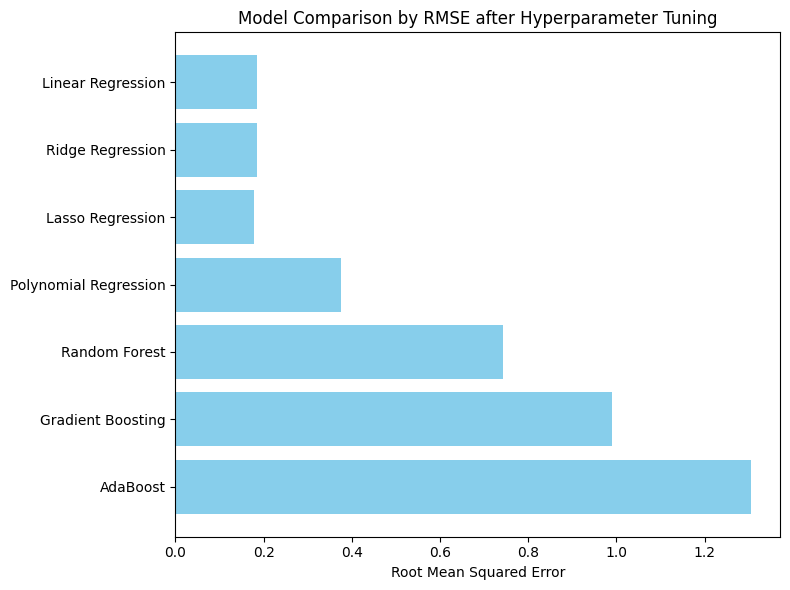

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from data_loader import load_df1, load_df2

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


df1 = load_df1()
df2 = load_df2()

feature_cols = [
    'Temperature_Habitacion_Sensor', 'Weather_Temperature',
    'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor',
    'Lighting_Comedor_Sensor', 'Hour', 'Month', 'Day_Of_Week'
]
target_col = 'Temperature_Comedor_Sensor'

if not all(col in df1.columns for col in feature_cols + [target_col]):
    print("Please update feature_cols and target_col with actual column names from your data.")
    exit()

X_train = df1[feature_cols]
y_train = df1[target_col]
X_test = df2[feature_cols]
y_test = df2[target_col]


model_params = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.1, 1.0, 10.0, 100.0]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.01, 0.1, 1.0, 10.0]}
    },
    "Polynomial Regression": {
        "model": Pipeline([
            ('poly', PolynomialFeatures()),
            ('linear', LinearRegression())
        ]),
        "params": {"poly__degree": [2, 3, 4]}
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7]}
    },
    "AdaBoost": {
        "model": AdaBoostRegressor(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    }
}

results = {}

for name, mp in model_params.items():
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2, 'y_pred': y_pred, 'best_params': grid.best_params_}
    print(f"Best params for {name}: {grid.best_params_}")


summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MSE': [res['mse'] for res in results.values()],
    'RMSE': [res['rmse'] for res in results.values()],
    'MAE': [res['mae'] for res in results.values()],
    'R2 Score': [res['r2'] for res in results.values()]
})
print("\nModel Performance Summary:")
print(summary_df)
# Identify best model by RMSE
best_model = min(results, key=lambda k: results[k]['rmse'])
best_score = results[best_model]['rmse']
print(f"✅ Best model: **{best_model}** with RMSE: **{best_score:.4f}**\n")
print(f"✅ Best model: **{best_model}** with R2: **{results[best_model]['r2']:.4f}**\n")



plt.figure(figsize=(8, 6))
plt.barh(summary_df['Model'], summary_df['RMSE'], color='skyblue')
plt.xlabel('Root Mean Squared Error')
plt.title('Model Comparison by RMSE after Hyperparameter Tuning')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


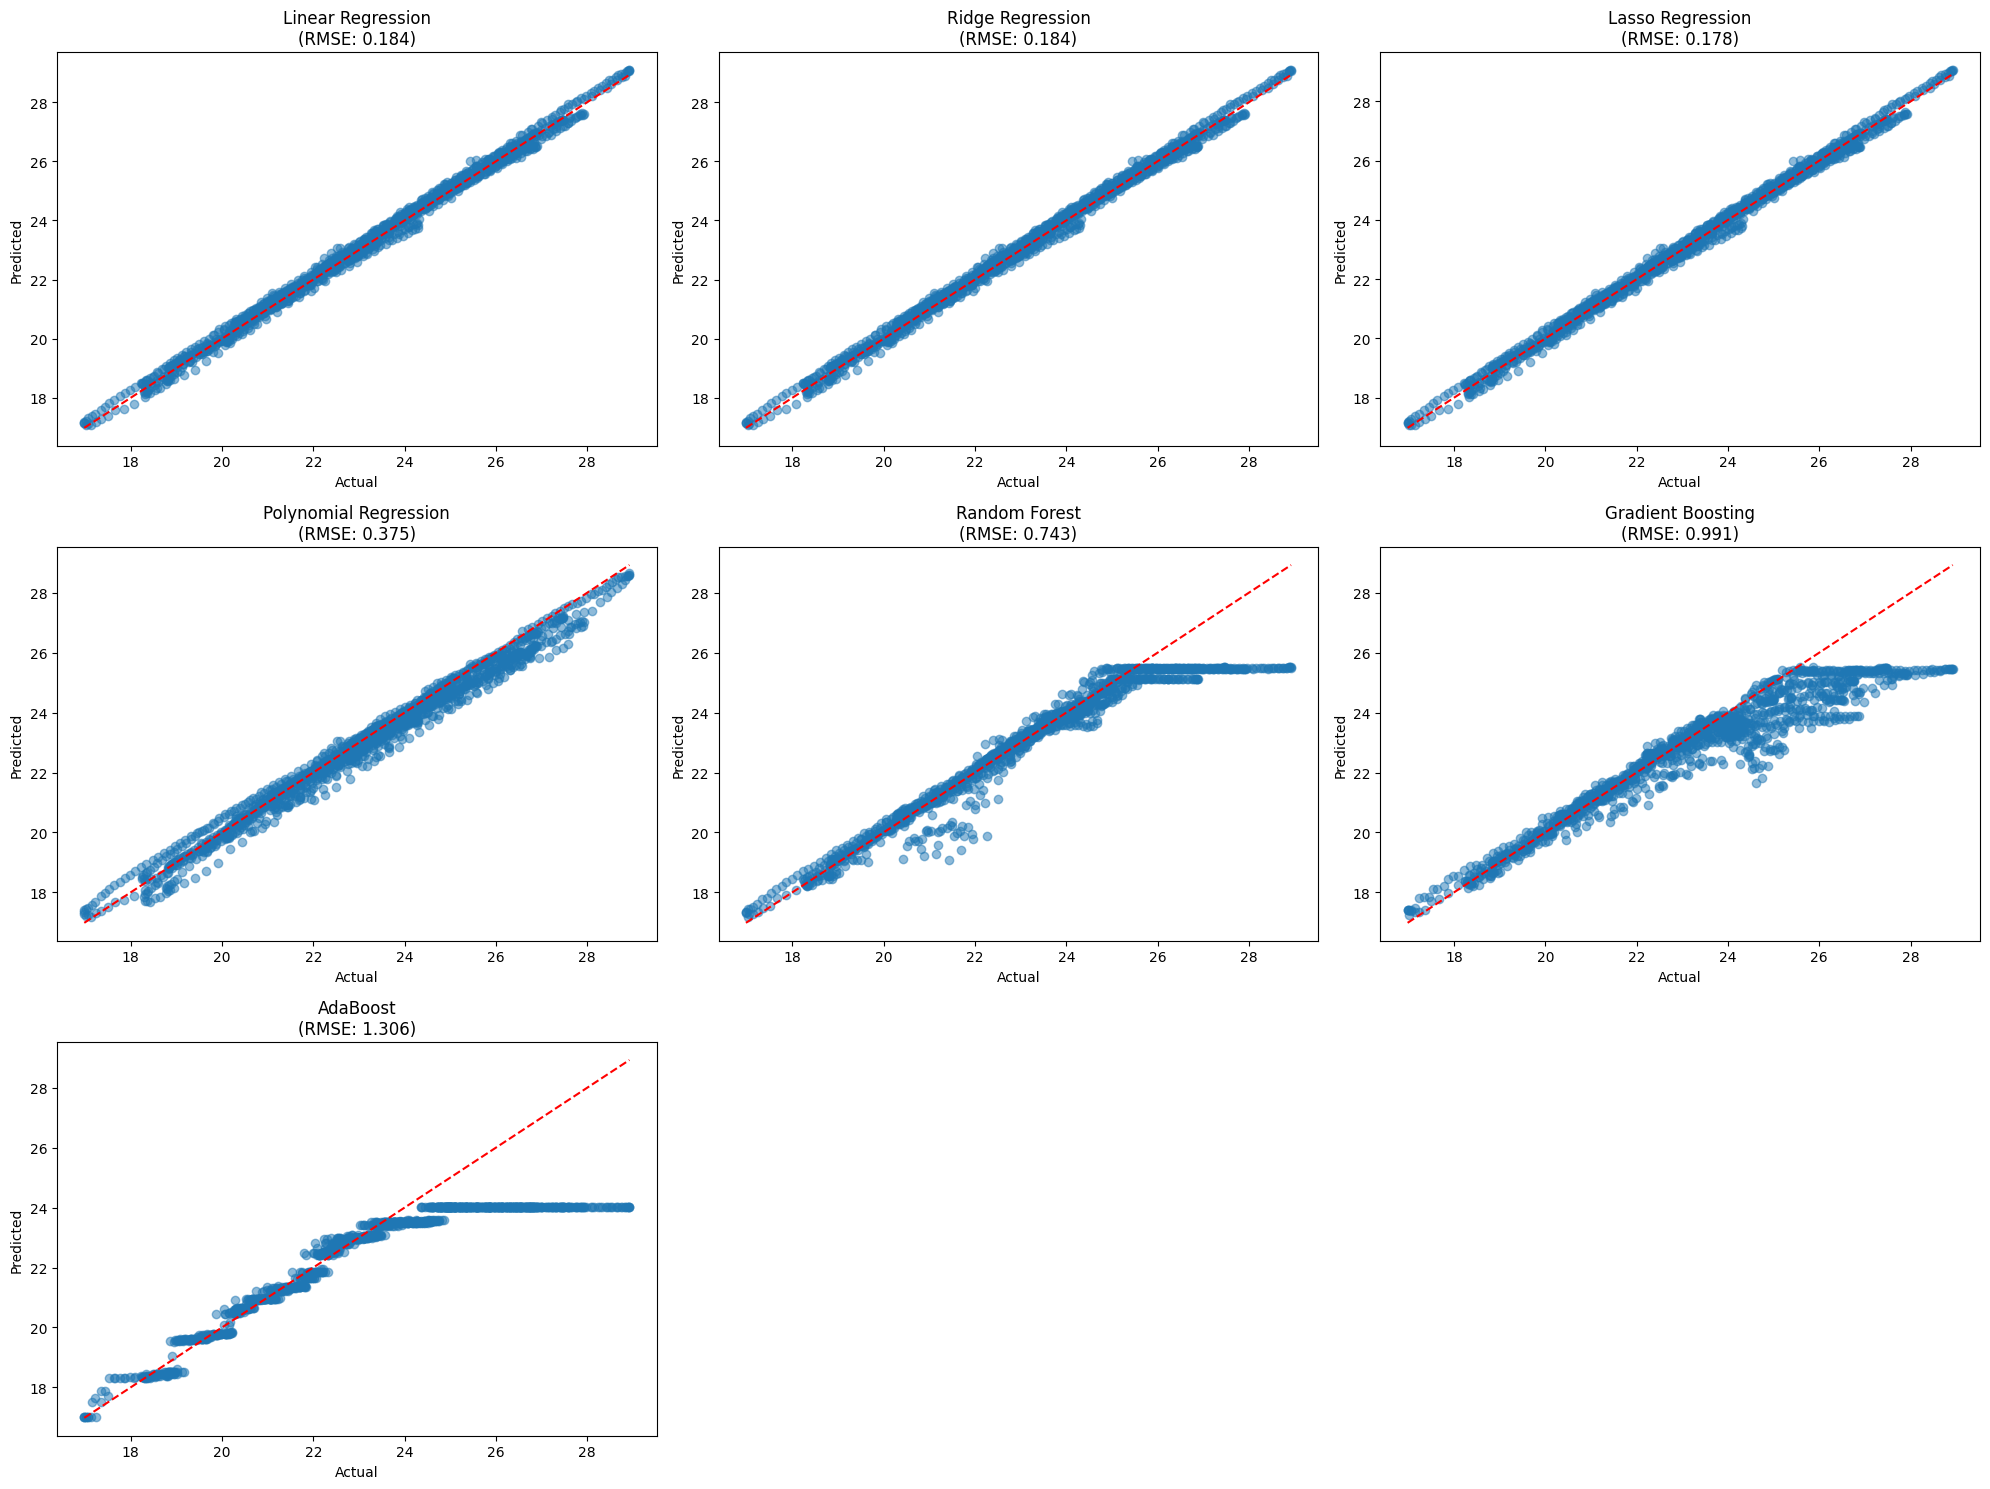

In [104]:
# Plot predictions vs actuals after hypertuning
plt.figure(figsize=(20, 15))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(3, 3, i+1)
    plt.scatter(y_test, res['y_pred'], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"{name}\n(RMSE: {res['rmse']:.3f})")
plt.tight_layout()
plt.show()

# Anomaly Detection

This section uses Isolation Forest algorithm to detect anomalies in sensor data:

1. **Isolation Forest Algorithm**
   - Based on the principle that anomalies are easier to isolate
   - Average path length formula: $c(n) = 2H(n-1) - (2(n-1)/n)$
   where:
   - $H(i)$ is the harmonic number
   - $n$ is the number of samples

2. **Anomaly Score**
   $s(x,n) = 2^{-\frac{E(h(x))}{c(n)}}$
   where:
   - $E(h(x))$ is the average path length
   - $c(n)$ is the adjustment factor
   - Score close to 1 indicates anomaly

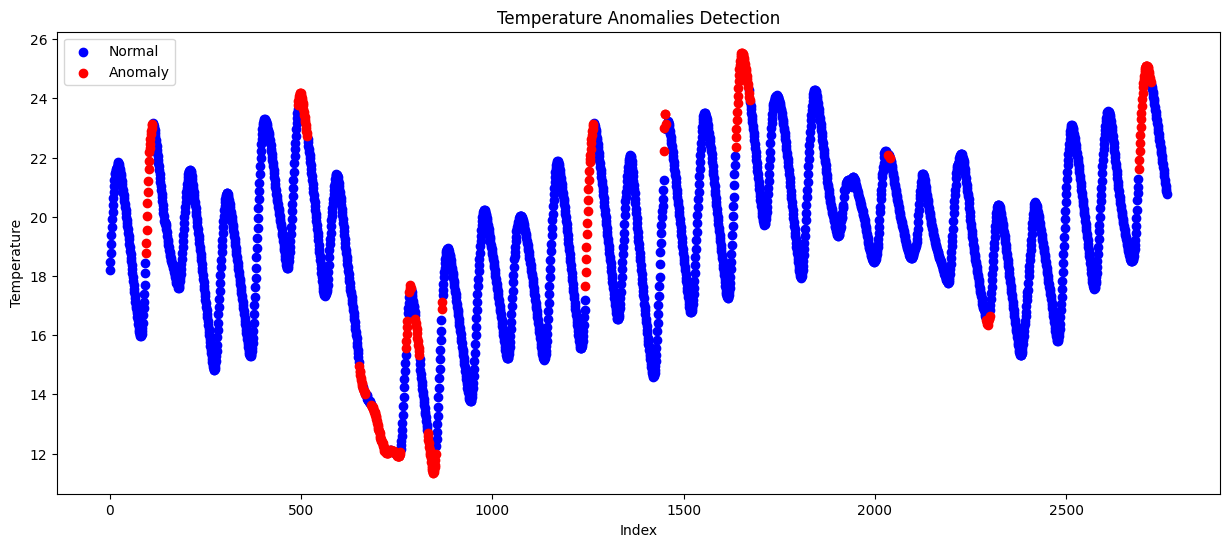

Number of anomalies detected: 277
Percentage of anomalies: 10.02%


In [105]:
# Anomaly Detection using Isolation Forest
from sklearn.ensemble import IsolationForest

# Prepare features for anomaly detection
anomaly_features = ['Temperature_Comedor_Sensor', 'CO2_Comedor_Sensor', 
                   'Humedad_Comedor_Sensor', 'Temperature_Exterior_Sensor']
X_anomaly = df1[anomaly_features].dropna()

# Fit Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iforest.fit_predict(X_anomaly)

# Add anomaly predictions to dataframe
X_anomaly['is_anomaly'] = anomalies == -1

# Visualize anomalies in temperature data
plt.figure(figsize=(15, 6))
plt.scatter(X_anomaly.index[~X_anomaly['is_anomaly']], 
            X_anomaly['Temperature_Comedor_Sensor'][~X_anomaly['is_anomaly']], 
            c='blue', label='Normal')
plt.scatter(X_anomaly.index[X_anomaly['is_anomaly']], 
            X_anomaly['Temperature_Comedor_Sensor'][X_anomaly['is_anomaly']], 
            c='red', label='Anomaly')
plt.title('Temperature Anomalies Detection')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Print summary of anomalies
print(f"Number of anomalies detected: {X_anomaly['is_anomaly'].sum()}")
print(f"Percentage of anomalies: {(X_anomaly['is_anomaly'].sum() / len(X_anomaly)) * 100:.2f}%")


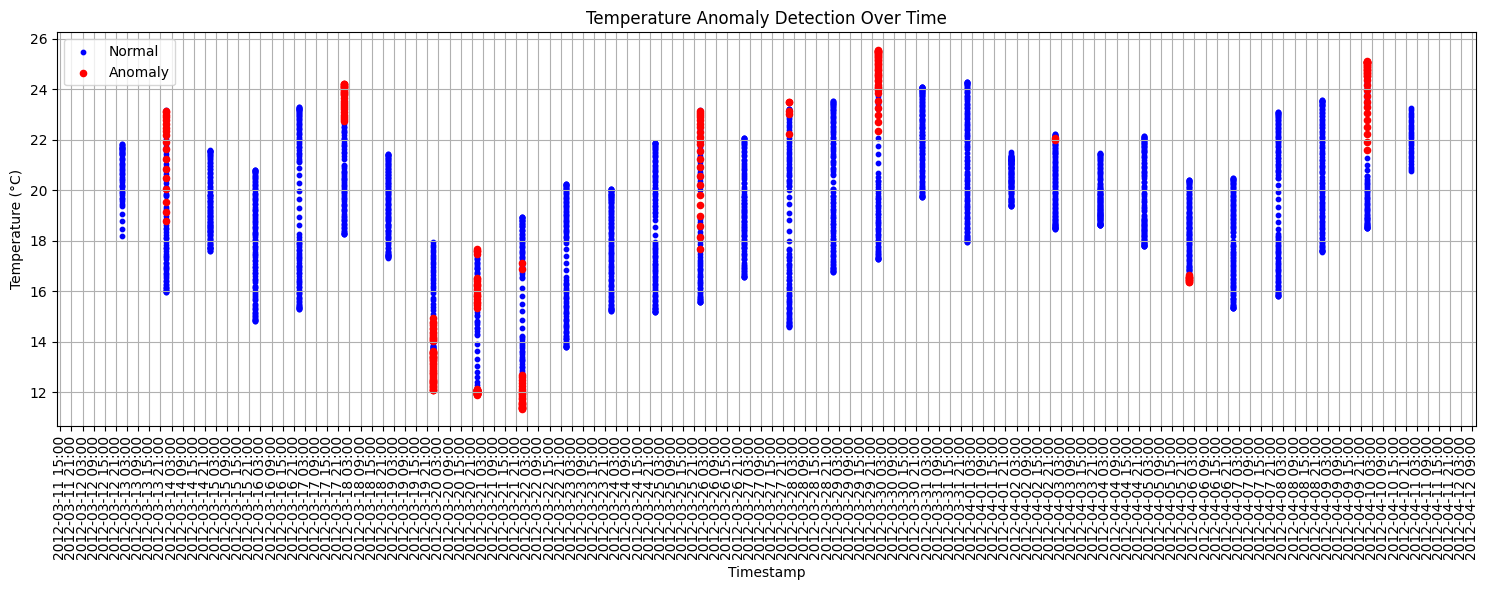

Number of anomalies detected: 277
Percentage of anomalies: 10.02%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import IsolationForest

df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

anomaly_features = ['Temperature_Comedor_Sensor', 'CO2_Comedor_Sensor', 
                    'Humedad_Comedor_Sensor', 'Temperature_Exterior_Sensor']
X_anomaly = df1[anomaly_features].dropna().copy()

iforest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iforest.fit_predict(X_anomaly)

X_anomaly['is_anomaly'] = anomalies == -1

plt.figure(figsize=(15, 6))
plt.scatter(X_anomaly.index[~X_anomaly['is_anomaly']],
            X_anomaly['Temperature_Comedor_Sensor'][~X_anomaly['is_anomaly']],
            c='blue', label='Normal', s=10)
plt.scatter(X_anomaly.index[X_anomaly['is_anomaly']],
            X_anomaly['Temperature_Comedor_Sensor'][X_anomaly['is_anomaly']],
            c='red', label='Anomaly', s=20)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=90)

plt.title('Temperature Anomaly Detection Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

num_anomalies = X_anomaly['is_anomaly'].sum()
print(f"Number of anomalies detected: {num_anomalies}")
print(f"Percentage of anomalies: {(num_anomalies / len(X_anomaly)) * 100:.2f}%")


## Residual Analysis
Generating residual plots to analyze prediction errors for each model:

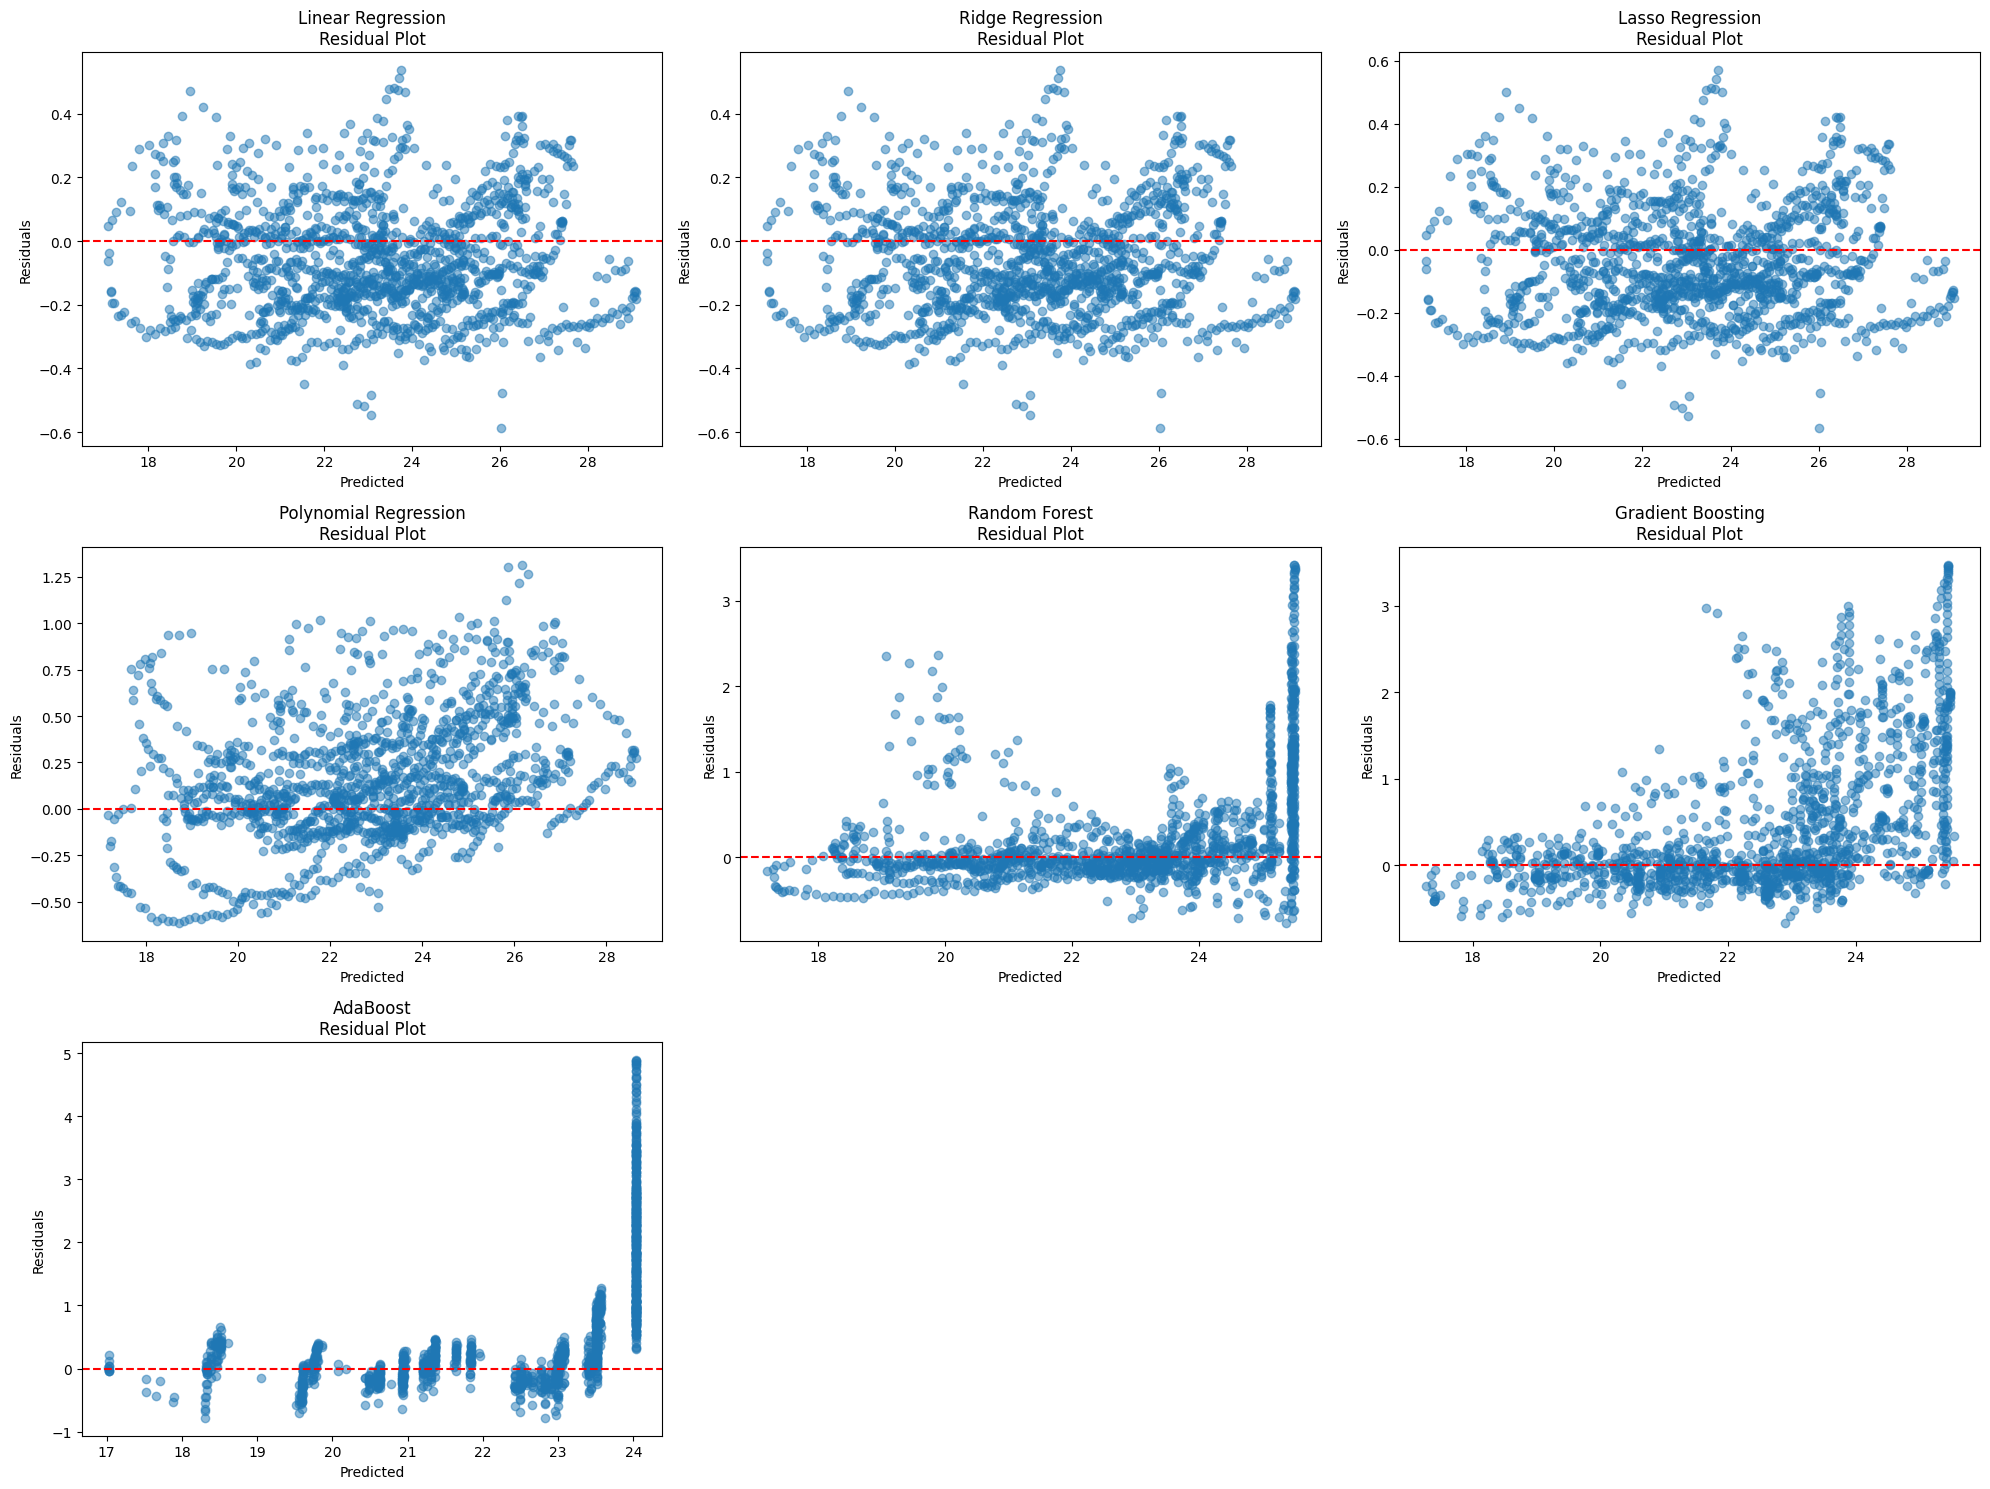

In [107]:
# Residual plots for each model
plt.figure(figsize=(20, 15))
for i, (name, res) in enumerate(results.items()):
    residuals = y_test - res['y_pred']
    plt.subplot(3, 3, i+1)
    plt.scatter(res['y_pred'], residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f"{name}\nResidual Plot")
plt.tight_layout()
plt.show()

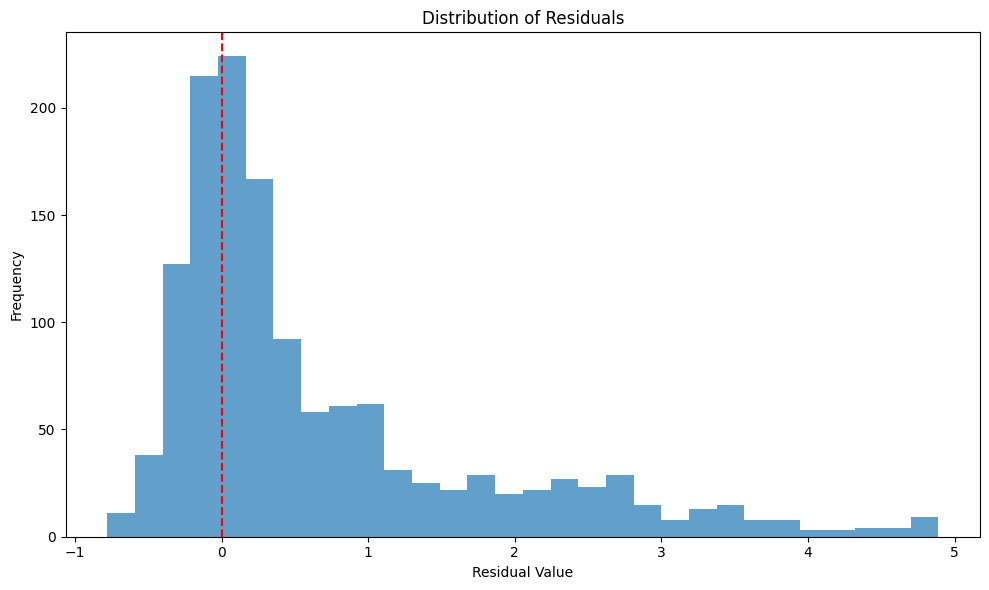

In [108]:

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

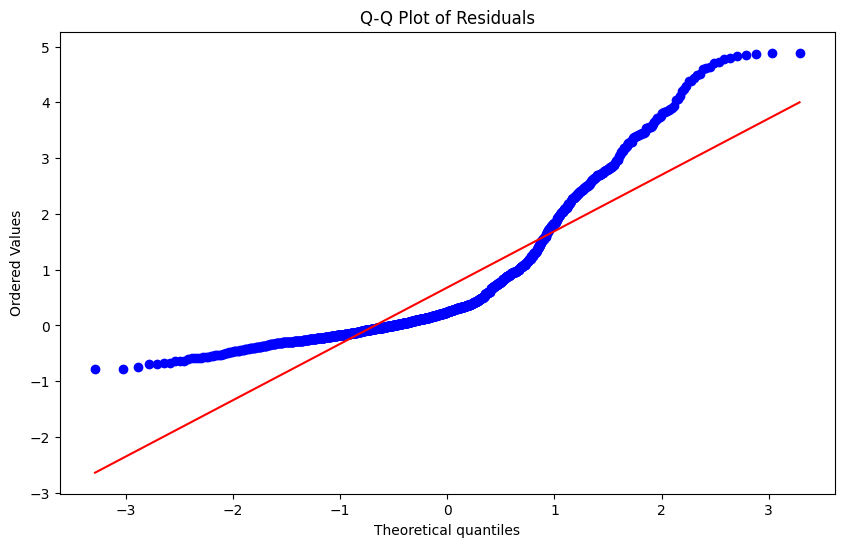

In [109]:
import scipy.stats as stats
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

## Feature Importance Analysis
Visualizing feature importance for tree-based models (Random Forest, Gradient Boosting, and AdaBoost):

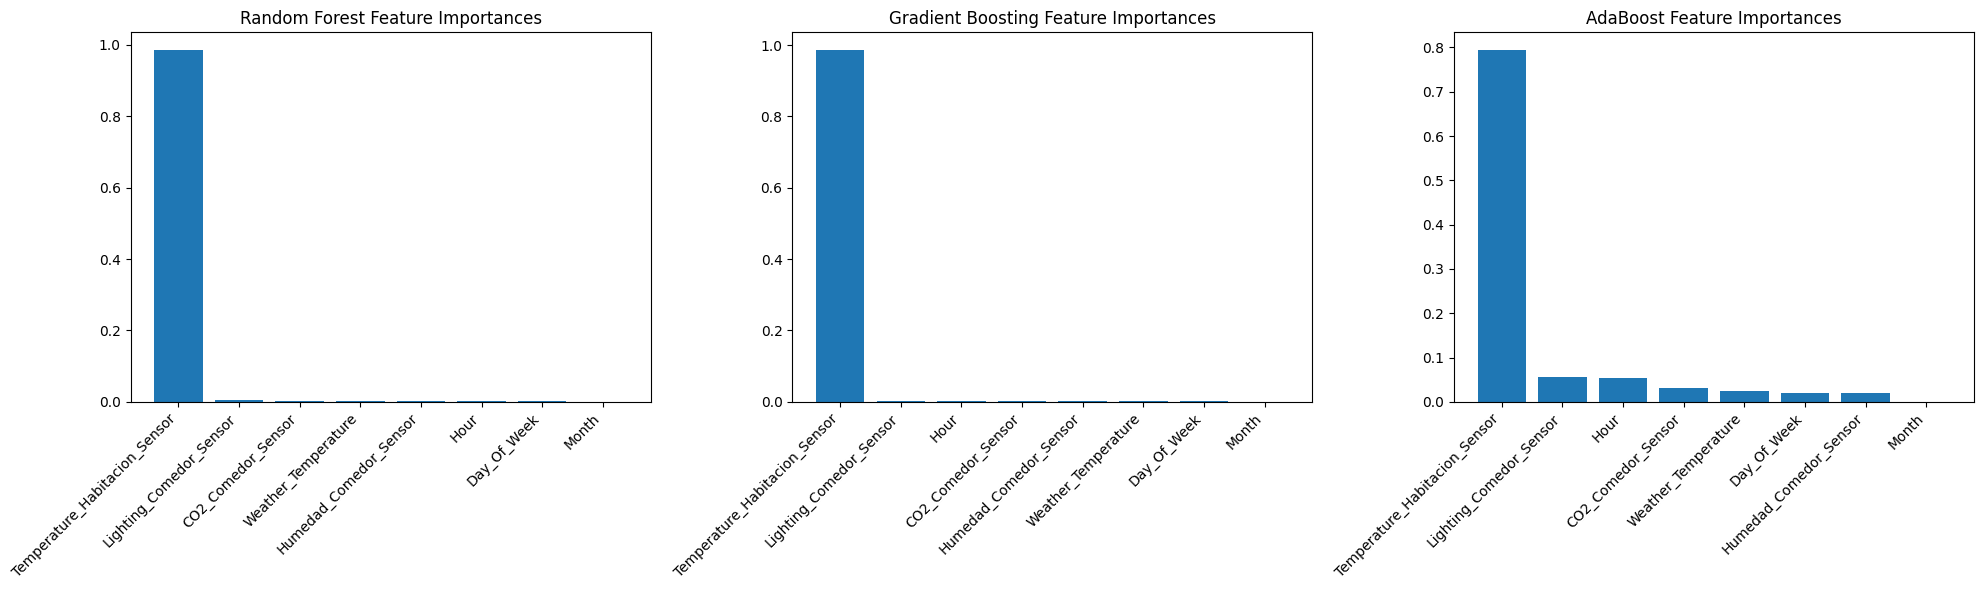

In [110]:
# Feature importance for tree-based models
tree_models = ["Random Forest", "Gradient Boosting", "AdaBoost"]
plt.figure(figsize=(20, 6))
for i, name in enumerate(tree_models):
    model = models[name]
    if hasattr(model, 'feature_importances_'):
        plt.subplot(1, 3, i+1)
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_cols[j] for j in indices], rotation=45, ha='right')
        plt.title(f"{name} Feature Importances")
plt.tight_layout()
plt.show()

## Additional Visualizations
Let's explore more insights from our models and data:

Plotting learning curves for: Linear Regression


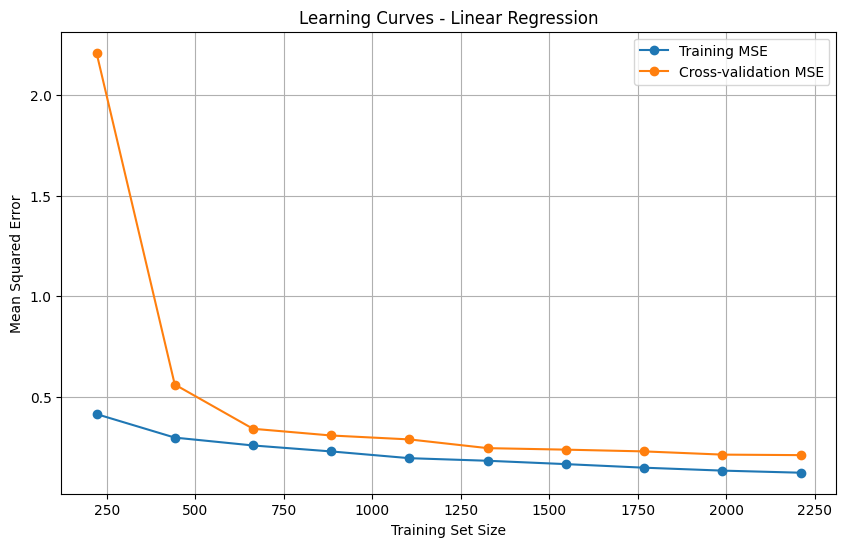

Plotting learning curves for: Ridge Regression


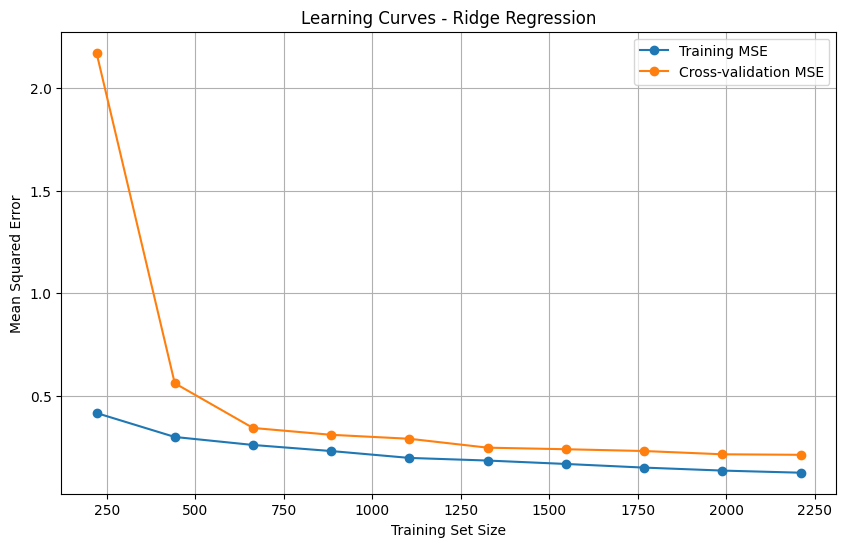

Plotting learning curves for: Lasso Regression


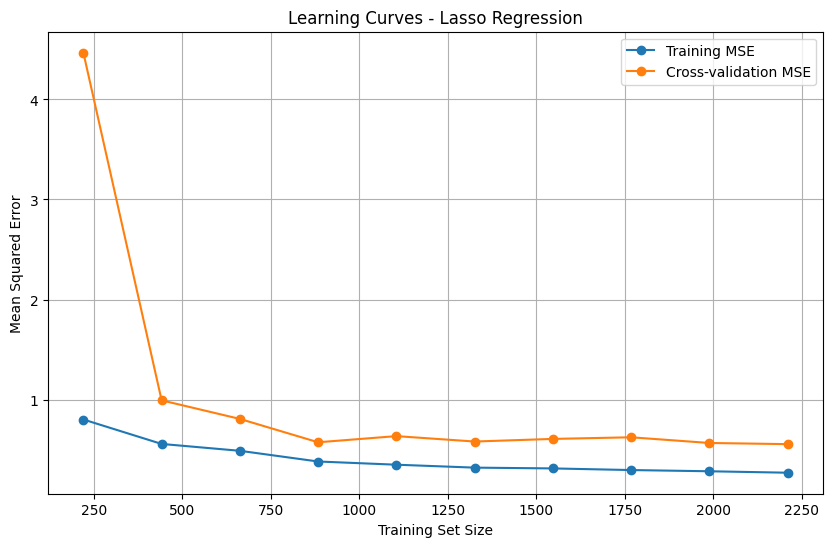

Plotting learning curves for: Polynomial Regression


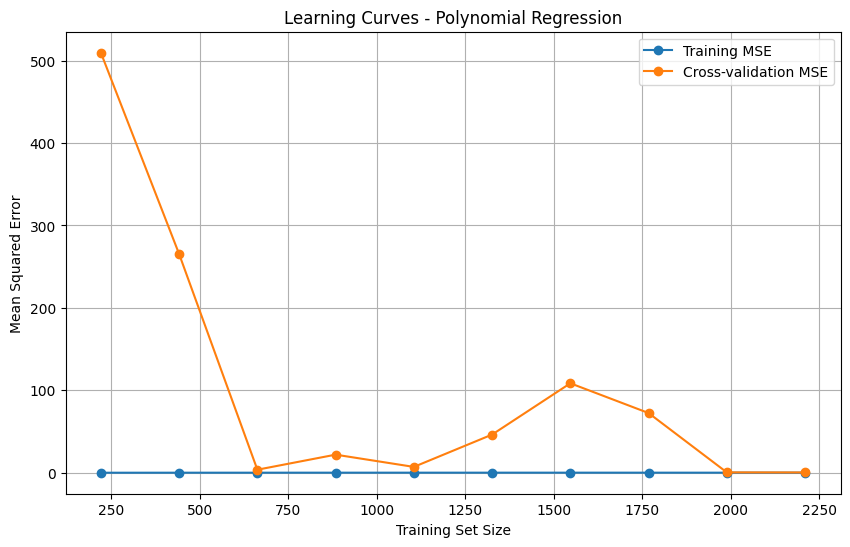

Plotting learning curves for: Random Forest


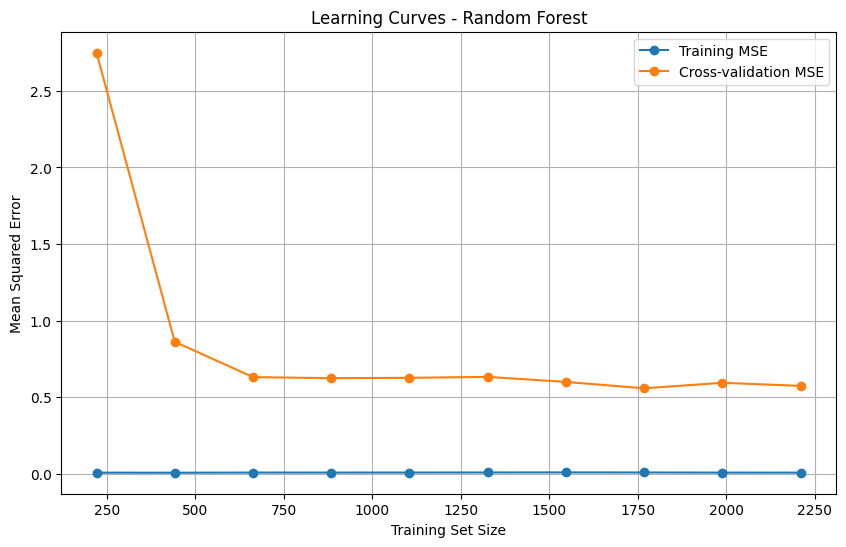

Plotting learning curves for: Gradient Boosting


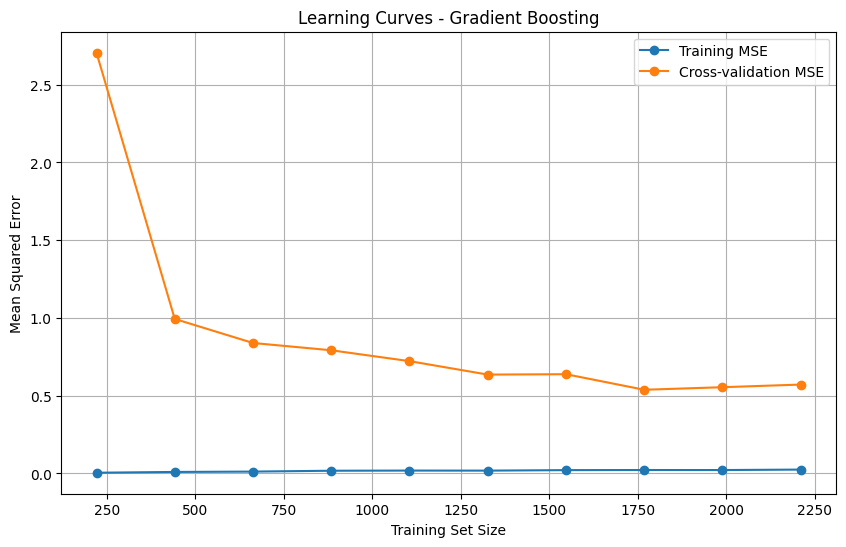

Plotting learning curves for: AdaBoost


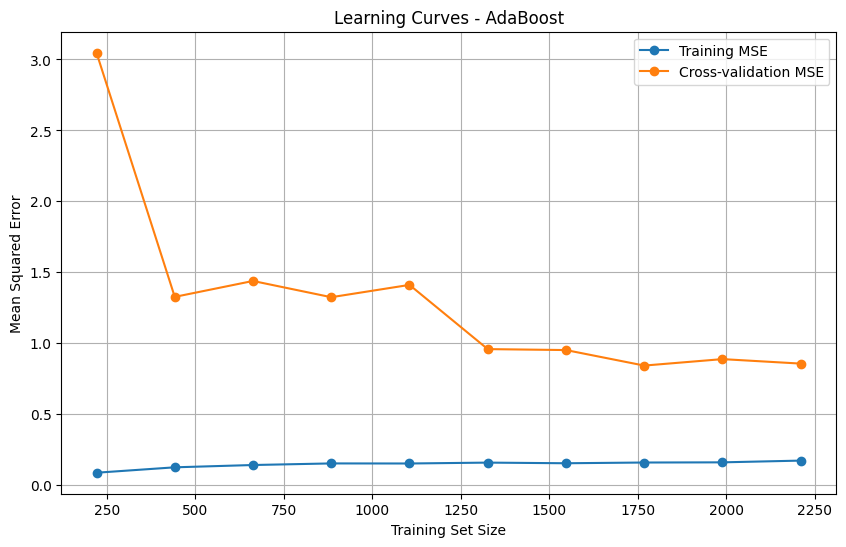

In [111]:
from sklearn.model_selection import learning_curve
def plot_learning_curves(model, model_name, X, y): 
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5, scoring='neg_mean_squared_error', n_jobs=-1 
    )
    
    train_scores_mean = -train_scores.mean(axis=1)
    val_scores_mean = -val_scores.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training MSE') 
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Cross-validation MSE') 
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Learning Curves - {model_name}') 
    plt.legend()
    plt.grid(True)
    plt.show()


for model_name, model_instance in models.items():
    print(f"Plotting learning curves for: {model_name}")
    # Call the plotting function here!
    plot_learning_curves(model_instance, model_name, X_train, y_train)


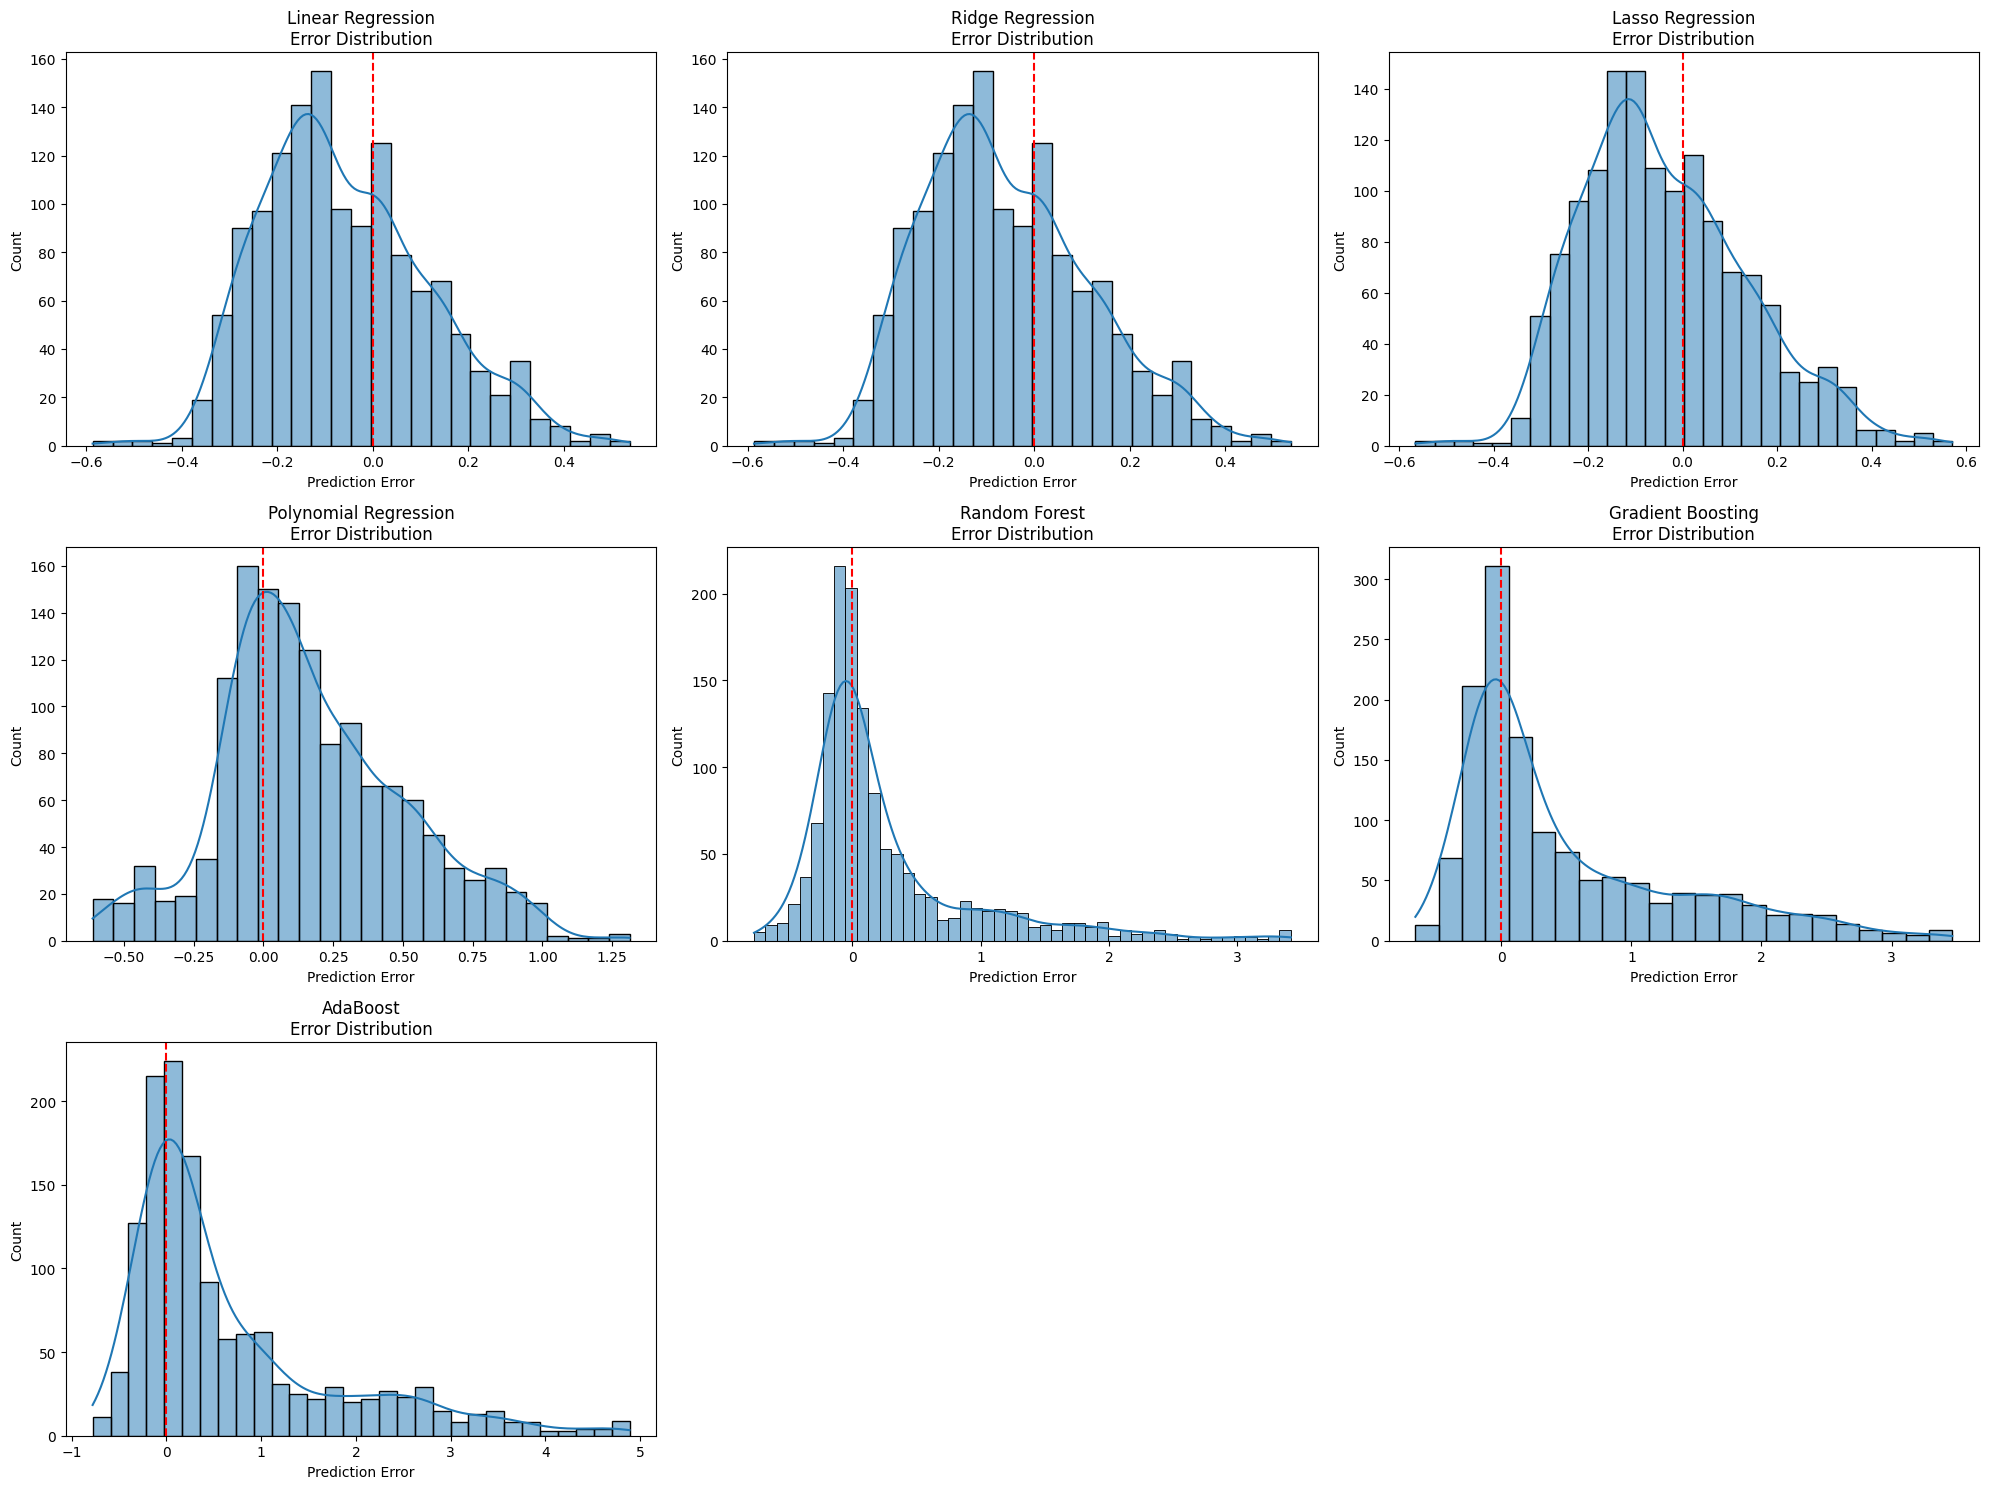

In [112]:
# Distribution of prediction errors for each model
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(3, 3, i+1)
    errors = y_test - res['y_pred']
    sns.histplot(errors, kde=True)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.title(f'{name}\nError Distribution')
plt.tight_layout()
plt.show()

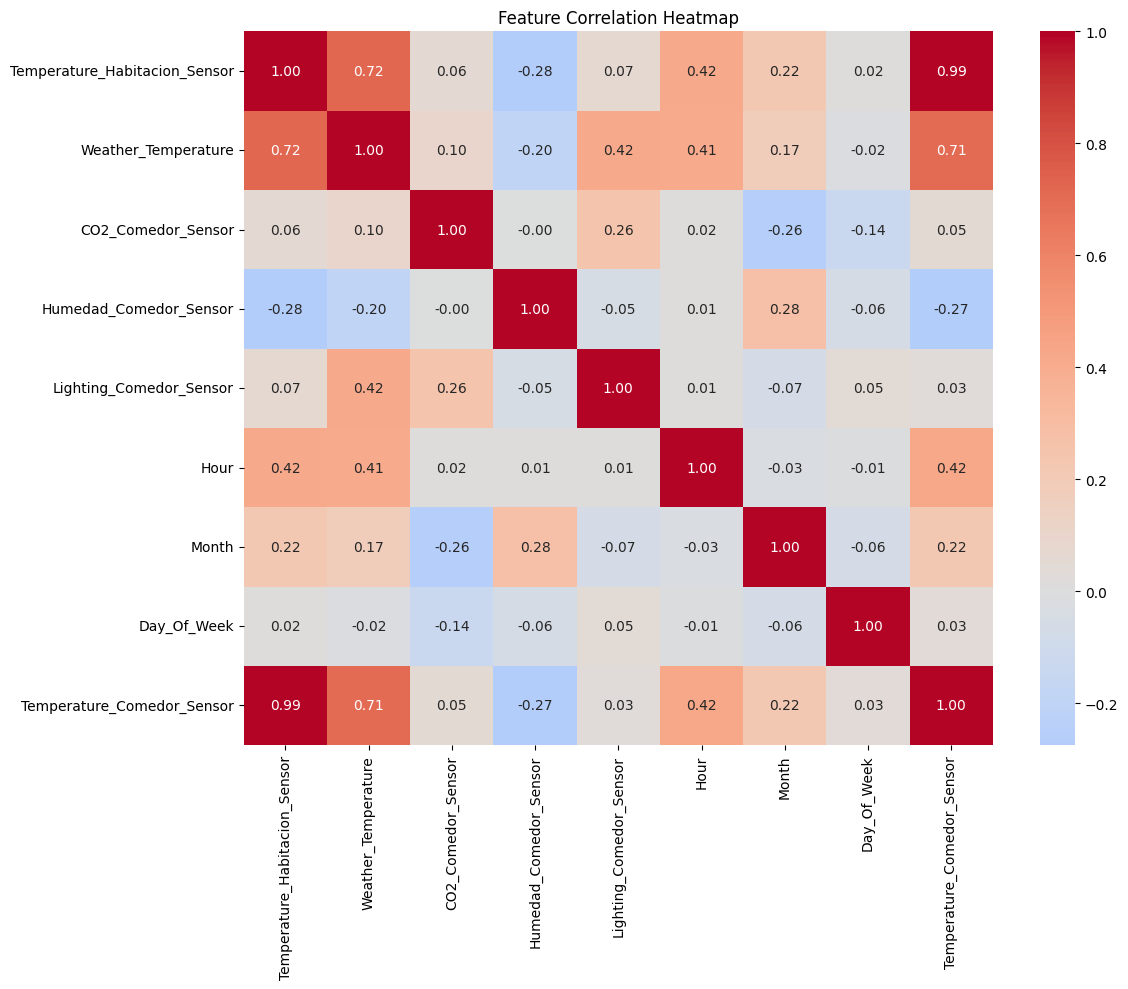

In [113]:
# Feature correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df1[feature_cols + [target_col]].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0
            , fmt=".2f",)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

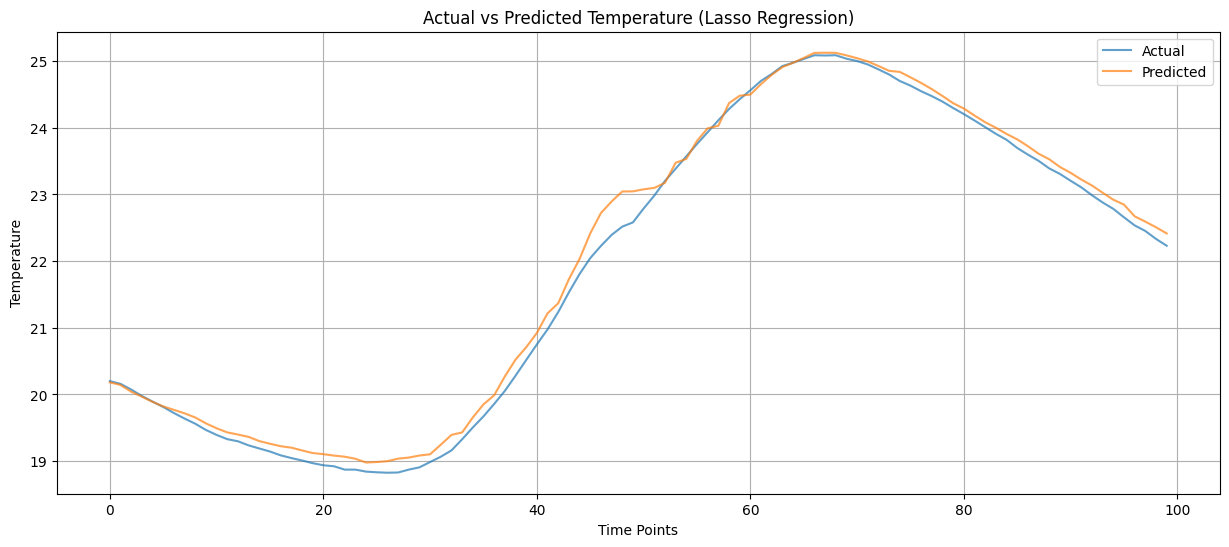

In [114]:
# Time series plot of actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Actual', alpha=0.7)
plt.plot(results[best_model]['y_pred'][:100], label='Predicted', alpha=0.7)
plt.xlabel('Time Points')
plt.ylabel('Temperature')
plt.title(f'Actual vs Predicted Temperature ({best_model})')
plt.legend()
plt.grid(True)
plt.show()

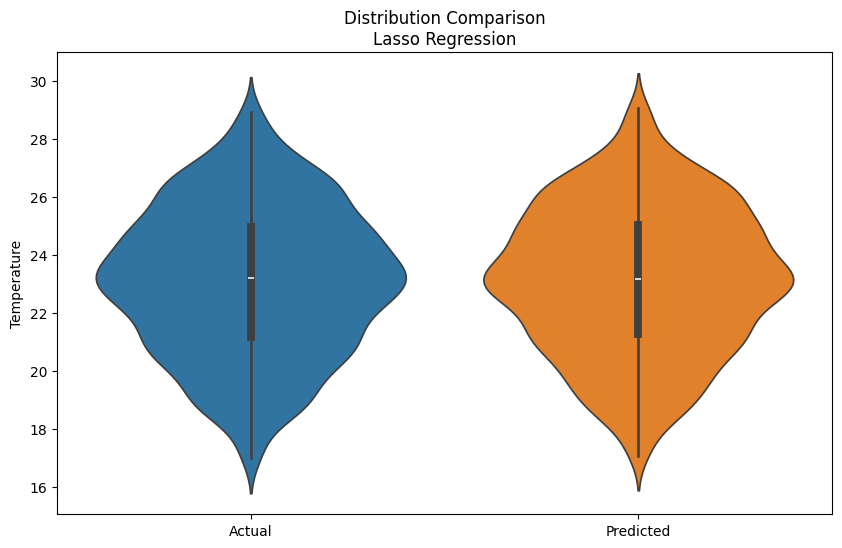

In [115]:
# Violin plots of actual vs predicted distributions
pred_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': results[best_model]['y_pred']
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=pred_data)
plt.title(f'Distribution Comparison\n{best_model}')
plt.ylabel('Temperature')
plt.show()

## Model Persistence (Optional)
Code for saving trained models to disk (currently commented out):

In [116]:
# import joblib

# for name, model in models.items():
#     filename = f"{name.replace(' ', '_').lower()}_model.pkl"
#     joblib.dump(model, filename)
#     print(f"Saved {name} model to {filename}")
